In [43]:
# preparing the environment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30,10)

np.random.seed(0)

In [44]:
# read in the file
df = pd.read_csv('ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Missing Values

In [45]:
# handling missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64


In [46]:
# missing values in percentage
print((missing_values_count/len(df)) * 100)

ID                  0.000000
name                0.001056
category            0.000000
main_category       0.000000
currency            0.000000
deadline            0.000000
goal                0.000000
launched            0.000000
pledged             0.000000
state               0.000000
backers             0.000000
country             0.000000
usd pledged         1.002744
usd_pledged_real    0.000000
usd_goal_real       0.000000
dtype: float64


In [47]:
# total missing value in percentage
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

(total_missing/total_cells) * 100

0.06692001552840139

0.067% of values are missing, 0.0011% missing "name", 1% missing "usd pledged"

Let's take a deeper look into the entries with missing values

In [48]:
# on "name"
missing_name = df[df.name.isnull()]
missing_name

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


In [49]:
# on "usd pledged"
missing_usd_pledged = df[df['usd pledged'].isnull()]
missing_usd_pledged.sample(100)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
358526,896485300,Protecting Cedar Mesa’s Remnants of the Past –...,Film & Video,Film & Video,USD,2014-12-06,7500.0,2014-11-12 00:08:11,8729.00,undefined,0,"N,0""",NaN,8729.00,7500.00
78899,1401451303,Rebecca Lawrence's Solo Project,Music,Music,USD,2015-04-02,2000.0,2015-03-03 21:20:51,1.00,undefined,0,"N,0""",NaN,1.00,2000.00
91475,1464820550,The Love Will Not Be Defeated Tour,Music,Music,USD,2015-05-01,3000.0,2015-04-01 02:57:39,3045.00,undefined,0,"N,0""",NaN,3045.00,3000.00
18136,1092014622,Becoming a Woman Whose God is Enough - Teachin...,Film & Video,Film & Video,USD,2014-09-15,5325.0,2014-08-15 01:11:22,7525.00,undefined,0,"N,0""",NaN,7525.00,5325.00
233099,25481307,Oliveye's music album debut: Come Undone,Music,Music,CAD,2015-03-23,5000.0,2015-02-11 20:33:43,5167.00,undefined,0,"N,0""",NaN,4130.63,3997.12
3825,1019686062,Fairest the Musical Full Cast Concept Album,Music,Music,USD,2015-06-22,4000.0,2015-05-23 06:35:07,0.00,undefined,0,"N,0""",NaN,0.00,4000.00
13754,1069219698,Everyday Experts,Publishing,Publishing,GBP,2015-09-25,1500.0,2015-08-26 19:45:01,0.00,undefined,0,"N,0""",NaN,0.00,2276.49
28652,1145448158,"Orange Stuff ""Here"", album pre-sale",Music,Music,CAD,2014-10-25,4000.0,2014-09-10 15:37:55,4205.00,undefined,0,"N,0""",NaN,3729.82,3547.99
337884,791103538,Saturn's Rings (A Film by Jake Burgess),Film & Video,Film & Video,CAD,2016-04-17,3000.0,2016-03-03 00:04:02,5750.99,undefined,0,"N,0""",NaN,4516.25,2355.90
128804,1653954505,"""Say Hello"" Music Video",Film & Video,Film & Video,USD,2014-10-15,7635.0,2014-09-13 02:13:31,25.00,undefined,0,"N,0""",NaN,25.00,7635.00


Seems like these missing values are actually missing, considering the portion is very small, they will be dropped before visual analysis

In [50]:
# Check for unique values in categorical columns to see if there is anything unusual 
print(df.country.unique())

['GB' 'US' 'CA' 'AU' 'NO' 'IT' 'DE' 'IE' 'MX' 'ES' 'N,0"' 'SE' 'FR' 'NL'
 'NZ' 'CH' 'AT' 'DK' 'BE' 'HK' 'LU' 'SG' 'JP']


In [51]:
# on "country", there is an odd value - 'N,0"', let's inspect that
# let's first see how many of them are there
len(df[df.country == 'N,0"'])

3797

In [52]:
# this looks familiar
len(df[df['usd pledged'].isnull()])

3797

In [53]:
# it's highly likely that the "NaN" in "usd pledged" co-occur with the 'N,0"' in "country", let's test that
df_this = df[df.country == 'N,0"']
df_that = df[df['usd pledged'].isnull()]
# same ID, same entry
(df_this.ID != df_that.ID).sum()

0

the test confirmed the assumption, so dropping the entries with missing values will also take care of this oddity

In [54]:
# now drop the entries with missing values
print(df.shape)
df = df.dropna()
print(df.shape)


(378661, 15)
(374860, 15)


# Dates
There appears to be two date columns - "deadline" and "launched", convert them into datetime object if necessary

In [55]:
# deadline
print(df.deadline.head(), '\n')
print(df.launched.head())

0    2015-10-09
1    2017-11-01
2    2013-02-26
3    2012-04-16
4    2015-08-29
Name: deadline, dtype: object 

0    2015-08-11 12:12:28
1    2017-09-02 04:43:57
2    2013-01-12 00:20:50
3    2012-03-17 03:24:11
4    2015-07-04 08:35:03
Name: launched, dtype: object


In [56]:
# parsing dates
# deadline
df['deadline_parsed'] = pd.to_datetime(df.deadline, format = "%Y-%m-%d")
print(df['deadline_parsed'].head(), '\n')

# launched - parse with just date
df['launch_date'] = pd.to_datetime(df.launched, format = '%Y-%m-%d').dt.date
df['launch_date'] = pd.to_datetime(df['launch_date'])
print(df['launch_date'].head(), '\n')

# launched - parsing with just time (because time of the date can be a variable by itself)
df['launch_time'] = pd.to_datetime(df.launched, format = '%Y-%m-%d').dt.time
df['launch_time'] = pd.to_datetime(df['launch_time'])
print(df['launch_time'].head())

0   2015-10-09
1   2017-11-01
2   2013-02-26
3   2012-04-16
4   2015-08-29
Name: deadline_parsed, dtype: datetime64[ns] 

0   2015-08-11
1   2017-09-02
2   2013-01-12
3   2012-03-17
4   2015-07-04
Name: launch_date, dtype: datetime64[ns] 



TypeError: <class 'datetime.time'> is not convertible to datetime

In [57]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 18 columns):
ID                  374860 non-null int64
name                374860 non-null object
category            374860 non-null object
main_category       374860 non-null object
currency            374860 non-null object
deadline            374860 non-null object
goal                374860 non-null float64
launched            374860 non-null object
pledged             374860 non-null float64
state               374860 non-null object
backers             374860 non-null int64
country             374860 non-null object
usd pledged         374860 non-null float64
usd_pledged_real    374860 non-null float64
usd_goal_real       374860 non-null float64
deadline_parsed     374860 non-null datetime64[ns]
launch_date         374860 non-null datetime64[ns]
launch_time         374860 non-null object
dtypes: datetime64[ns](2), float64(5), int64(2), object(9)
memory usage: 54.3+ MB
None


# Visual EDA

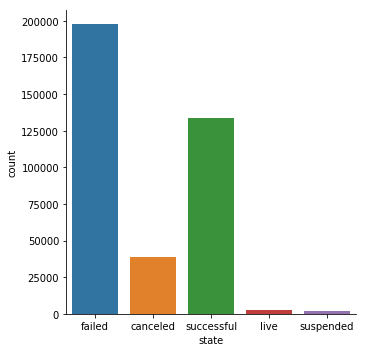

<Figure size 1080x576 with 0 Axes>

In [63]:
# Let's take a look at the "state" - counts of each level 
sns.catplot(x = 'state', kind = 'count', data = df)
plt.figure(figsize = (15,8))
plt.show()

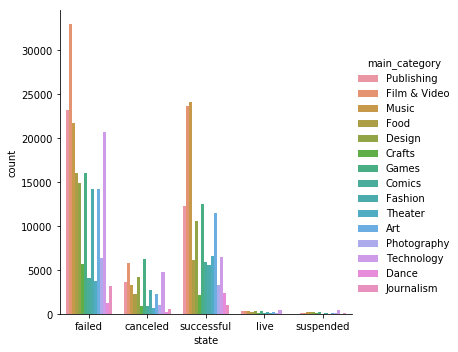

In [59]:
# separate by 'main_category'
sns.catplot(x='state', kind='count', hue='main_category', data=df)
plt.show()

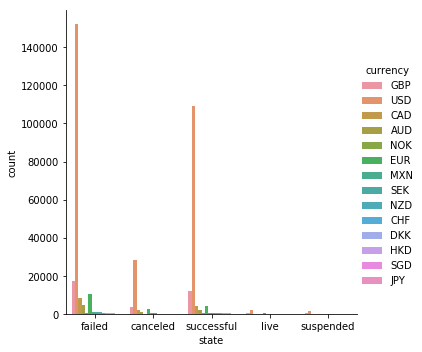

In [60]:
# separate by 'currency'
sns.catplot(x='state', kind='count', hue='currency', data=df)
plt.show()